# Analyse d'hétérogénéité

On étudie les résultats obtenus grâce au deuxième notebook, et on va essayer de mettre à jours des hétérogénéités dans les résultats

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [2]:
# Déclaration du lieu de stockage des données initiales, et des fichiers de résultat
data_folder = "data/" 
result_folder = "results/"

In [4]:
df = pd.read_csv( path.join( result_folder, 'AR.csv'))
df = df.drop_duplicates(subset = ['ISIN'])

# on veut garder seulement les données contenant des rendements anormaux
def is_float(str):
    try :
        float(str)
        return True
    except :
        return False

filter = np.all([[is_float(df[f'AR_{2*j}'].iloc[i]) for i in range(len(df))] for j in range(2,11)], axis = 0)
df = df[filter]
df[ df.columns[1:] ] = df[ df.columns[1:] ].apply(pd.to_numeric)
print(df.iloc[0][2::2])

Coef_4     0.187373
Coef_6     0.029418
Coef_8     0.150738
Coef_10    0.051454
Coef_12    0.114662
Coef_14      0.2044
Coef_16    0.199787
Coef_18    0.231008
Coef_20    0.330033
Name: 0, dtype: object


On va commencer par étudier les disparités entre les différents calculs de rendements anormaux, nottament la différence entre la valeur moyenne et la valeur au meilleur score de régression.

In [5]:
# récupération du rendement anormal au meilleur score de régression
def max(i):
    l = np.array(df.iloc[i][2::2]) # tous les scores de régression
    j = np.argmax(l)
    ar_max_score = df.iloc[i][1 + 2*j] # AR correspondant
    return j , l[j], ar_max_score

# Informations données par les scores des régresions linéaires
max_score = np.array([ max(i)[1] for i in range(len(df))])
max_score_i = np.array([max(i)[0] for i in range(len(df))])
AR_max_score = np.array([max(i)[2] for i in range(len(df))])

# Moyenne et écart-type
AR_moyen = np.array([ np.mean(df.iloc[i][1::2]) for i in range(len(df))])
Sigma = np.array([np.std(df.iloc[i][1::2]) for i in range(len(df))])



On voudrait légitimer le fait de se concentrer uniquement sur un seul rendement anormal, et on va donc comparer les rendement anormal moyens et les rendements anormaux dont la régression a le meilleure score. 
Le rendement anormal moyen serait un bon indicateur car moyenner les différentes régressions linéaires permet de lisser les erreurs de régression. Le rendement anormal au meilleur score de régression est quand à lui légitime car il témoigne du meilleur respect au modèle de marché.

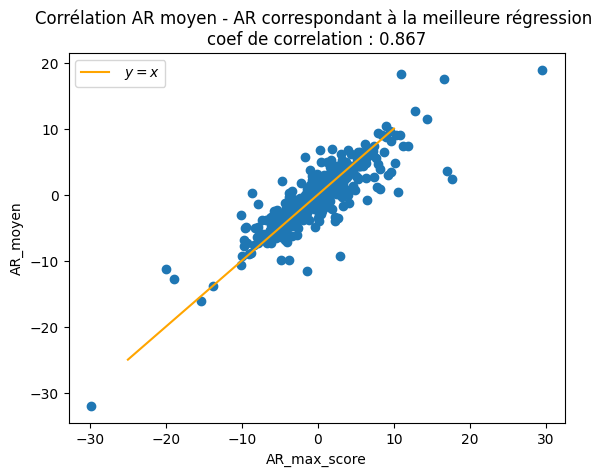

In [6]:
plt.figure()
plt.scatter(AR_max_score,  AR_moyen)
plt.plot([-25, 10] , [-25, 10] , color ='orange', label = ' $y=x$')
plt.xlabel('AR_max_score')
plt.ylabel('AR_moyen')
plt.title('Corrélation AR moyen - AR correspondant à la meilleure régression ' + '\n'
          + f'coef de correlation : { np.round(np.corrcoef(AR_max_score, AR_moyen)[0][1] , 3)}')
plt.legend()
plt.show();

In [7]:
print(f'rendement anormal moyen : {np.mean(AR_moyen)} %')
print(f'rendement anormal moyen : {np.mean(AR_max_score)} %')


rendement anormal moyen : -0.06039004747051643 %
rendement anormal moyen : -0.03783733527621371 %


On remarque une forte corrélation entre les 2 séléctions de rendements anormaux, et surtout les valeurs moyennées des deux sont proches, et toutes les deux négatives.

La première chose que l'on remarque est que l'effet global est **négatif**, mais proche de 0 $(<0.5 \% )$

 En gardant seulement les valeurs où la régression linéaire est convenable (score > 0.7), ou les résultats où l'écart-type varie de moins de 2% :
 

In [8]:
score_filter = max_score > 0.2
AR_max_score2 = AR_max_score[score_filter]
print(f'rendement anormal moyen avec contrainte de score: {np.mean(AR_max_score2)} %')
sigma_filter = Sigma < 10
AR_max_score3 = AR_max_score[sigma_filter]
print(f"rendement anormal moyen avec contrainte d'écart-type : {np.mean(AR_max_score3)} %")

rendement anormal moyen avec contrainte de score: -0.03404686643942649 %
rendement anormal moyen avec contrainte d'écart-type : -0.0295857013503176 %


In [ ]:
info = pd.read_csv(path.join(data_folder, 'info.csv') , sep =';', encoding= 'latin_1',
                   names = ['name' , 'ISIN' , 'Lei' , 'Country' , 'Continent',
                            'sector' , 'type']) 
#pb d'encodage, utf-8 non valide, et pas de header
info = info.drop_duplicates(subset = ['ISIN'])
info = info[info['ISIN'].notna()].set_index('ISIN')


In [ ]:
# aggrégation par secteurs et types 
isin = np.array(df['ISIN'])
sector = np.array([info.loc[i]['sector'] for i in isin])
compnay_type = np.array([info.loc[i]['type'] for i in isin])

# Informations données par les scores des régresions linéaires
max_score = np.array([ max(i)[1] for i in range(len(df))])
max_score_i = np.array([max(i)[0] for i in range(len(df))])
AR_max_score = np.array([max(i)[2] for i in range(len(df))])

# Moyenne et écart-type
AR_moyen = np.array([ np.mean(df.iloc[i][2::2]) for i in range(len(df))])
Sigma = np.array([np.std(df.iloc[i][2::2]) for i in range(len(df))])